In [4]:
import h5py 
import  numpy as np
import kagglehub
import pandas as pd
test_path = "test_catvsnoncat.h5"
train_path = "train_catvsnoncat.h5"

data_test = h5py.File(test_path, 'r')
data_train = h5py.File(train_path, 'r')

In [5]:
X_train = np.array(data_train['train_set_x'][:])
y_train = np.array(data_train['train_set_y'][:])
X_test = np.array(data_test['test_set_x'][:])
y_test = np.array(data_test['test_set_y'][:])


In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1, 1)


In [7]:
def relu(Z):
    return np.maximum(0, Z)


def sigmoid(Z):
    return 1/ (1+ np.exp(-Z))

In [13]:
def init_parameters():
    W1 = np.random.randn(128, n*p*r) * 0.01
    b1 = np.zeros((128,1)) 
    W2 = np.random.randn(1, 128) * 0.01
    b2 = np.zeros((1,1))
    return W1, b1, W2, b2

In [14]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, Z2, A2)
    y_pred = A2.T
    return cache, y_pred

In [15]:
def back_prop(W1, b1, W2, b2, X, y, cache):
    Z1, A1, Z2, A2 = cache
    m = X.shape[0]
    dZ2 = A2 - y.T
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1>0)
    dW1 = (1/m) * np.dot(dZ1, X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2
    
    
    

In [16]:
def train(X, y, W1, b1, W2, b2, lr=0.001, epochs=1000):
    losses= []
    for i in range(epochs):
        cache, y_pred = forward_prop(W1, b1, W2, b2, X)

        m = y.shape[0]
        loss = -np.mean(y*np.log(y_pred + 1e-8) + (1-y)*np.log(1-y_pred + 1e-8)) #why 1e-8
        losses.append(loss)

        dW1,db1, dW2, db2 = back_prop(W1, b1, W2, b2, X, y, cache)

        W1 -= lr* dW1
        b1 -=lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

        if i%100==0:
            print(f"epoch {i}, Loss : {loss:.4f}:")

    return W1, b1, W2, b2, losses


def predict(X, W1, b1, W2, b2, threshold=0.5):
    _, y_pred = forward_prop(W1, b1, W2, b2, X)
    return (y_pred > threshold).astype(int)   # 0 or 1

In [17]:
W1, b1, W2, b2 = init_parameters()
W1, b1, W2, b2, losses = train(X_train_flat, y_train, W1, b1, W2, b2, lr=0.001, epochs=10000)


NameError: name 'n' is not defined

In [244]:
import matplotlib.pyplot as plt
import math

def show_predictions_grid(X, y_true, W1, b1, W2, b2, per_row=5, img_shape=None):
    preds = predict(X, W1, b1, W2, b2)
    m = X.shape[0]
    correct = 0
    
    if img_shape is None:
        img_shape = X.shape[1:]
    
    rows = math.ceil(m / per_row)
    plt.figure(figsize=(per_row*2, rows*2))  # adjust size
    
    for i in range(m):
        plt.subplot(rows, per_row, i+1)
        plt.imshow(X[i].reshape(img_shape), cmap="gray")
        plt.axis("off")
        plt.title(f"Pred {preds[i][0]} | True {y_true[i]}")
    
    plt.tight_layout()
    plt.show()
    print(f"Accuracy: {correct/m:.2f}")

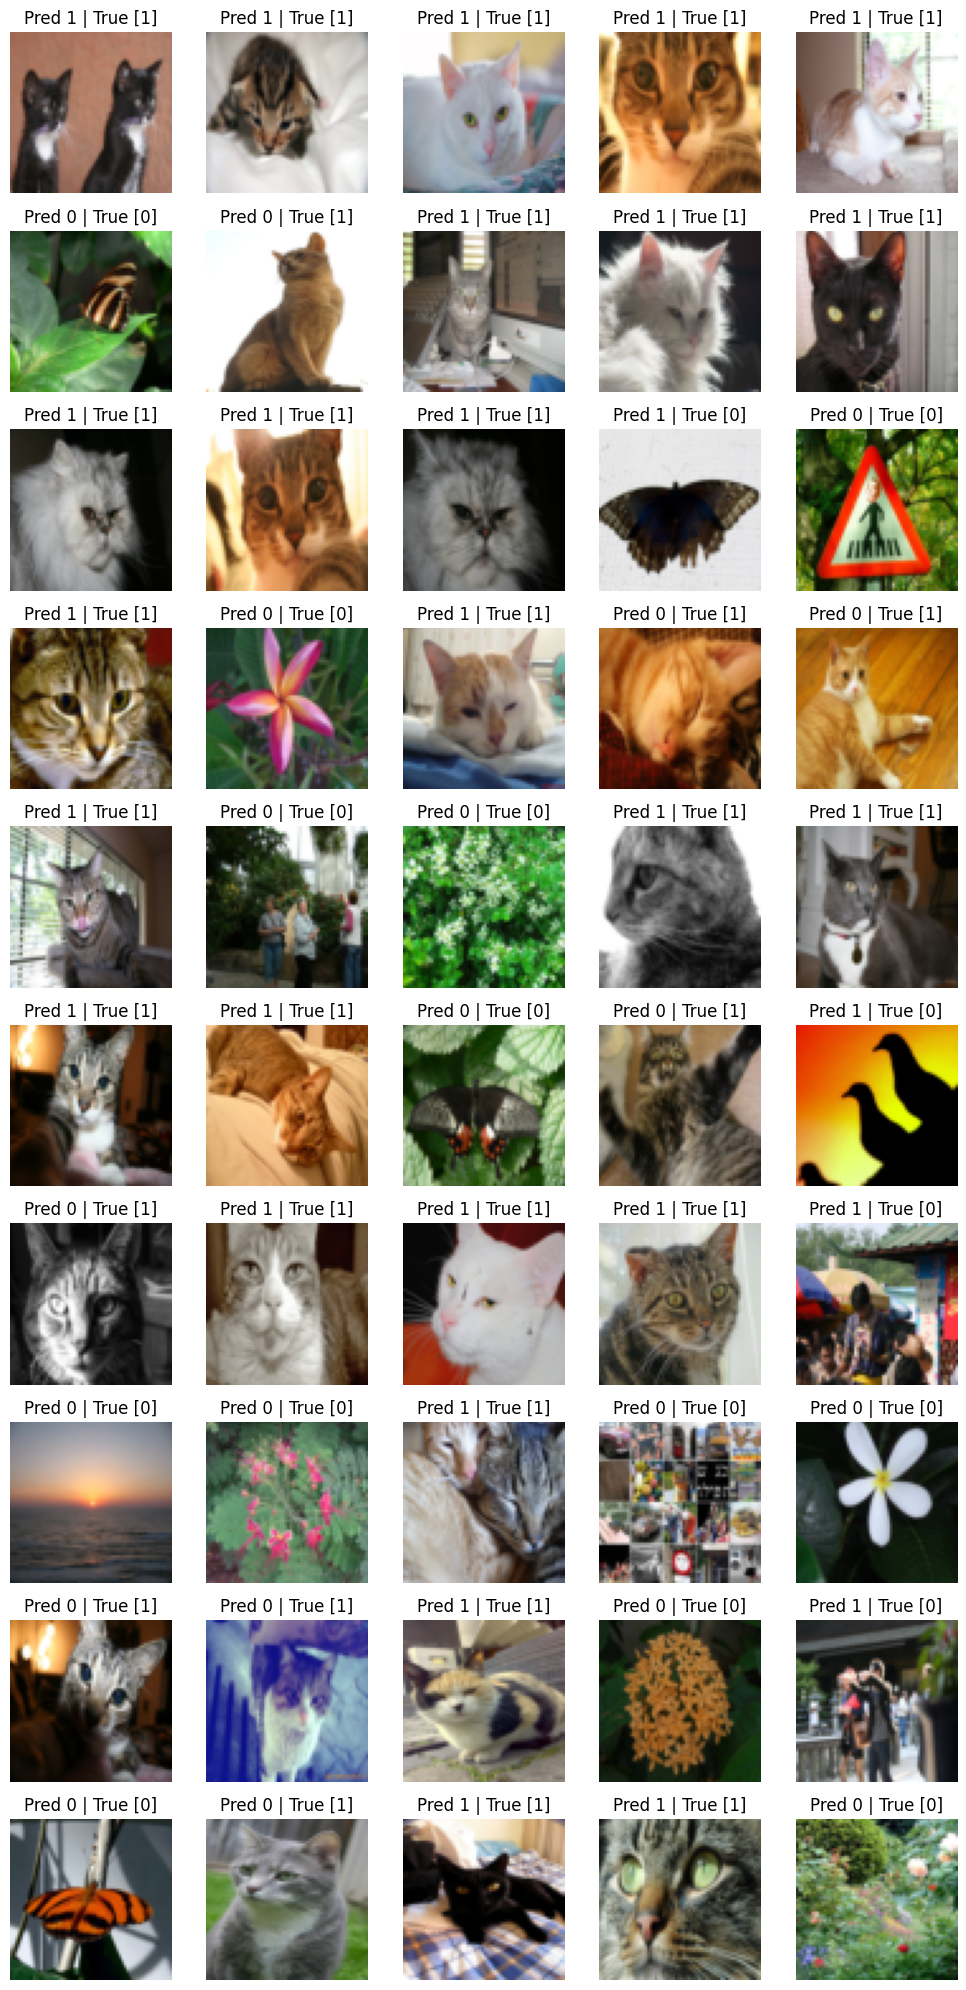

Accuracy: 0.00


In [245]:
show_predictions_grid(X_test_flat, y_test, W1, b1, W2, b2, img_shape=(n, p,r ))

209